# PP4: supervised learning

## Choose dataset

In [18]:
# Import Iris flower dataset and pprint for more readable output
from pprint import pprint
from sklearn.datasets import load_iris

# Initiate Iris flower dataset
iris_dataset = load_iris()

# Get to know data structure
print(f"type: {type(iris_dataset)}")
pprint(iris_dataset)

"""
Conclusion: dataset is saved in dictionary-like data structure <class 'sklearn.utils._bunch.Bunch'>.
The dataset contains a set of 5 attributes - 4 under "data" key, 1 under "target" key.
"feature_names" provides names for first 4 attributes.
"""


type: <class 'sklearn.utils._bunch.Bunch'>
{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean

'\nConclusion: dataset is saved in dictionary-like data structure.\nThe dataset contains a set of 5 attributes - 4 under "data" key, 1 under "target" key.\n"feature_names" provides names for first 4 attributes.\n'

## Analyze data

In [61]:
# Convert dataset to Pandas DataFrame for more detailed analysis

import pandas as pd

# Initiate pandas DataFrame with first 4 attributes
df = pd.DataFrame(iris_dataset["data"], columns=iris_dataset["feature_names"])
# Add last (5th) attribute
df["species"]=iris_dataset["target"]
df["species"]=df["species"].apply(lambda x: iris_dataset["target_names"][x])

# Get basic info about DataFrame
print(df.info) # Concise summary of a DataFrame.
print(df.shape) # (150, 5)
print(df.head()) # First 5 records
print(df.describe()) # Descriptive statistics
print(df.isnull().sum())
print(df.groupby("species").size()) # Group sizes for each species (class)

"""
Conclusions: 
1. Dataset contains 150 records - 50 in each of three Species (classes)
2. Column names are too long
"""

# Apply shorter column names
df = pd.DataFrame(iris_dataset["data"], columns=["setal length","setal width", "petal length","petal width"])
df["species"]=iris_dataset["target"]
df["species"]=df["species"].apply(lambda x: iris_dataset["target_names"][x])

# Verify shorter column names
print(df.head())

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

## Plotting/visualizing

Goal: to understand the relation ship between the numerical features.

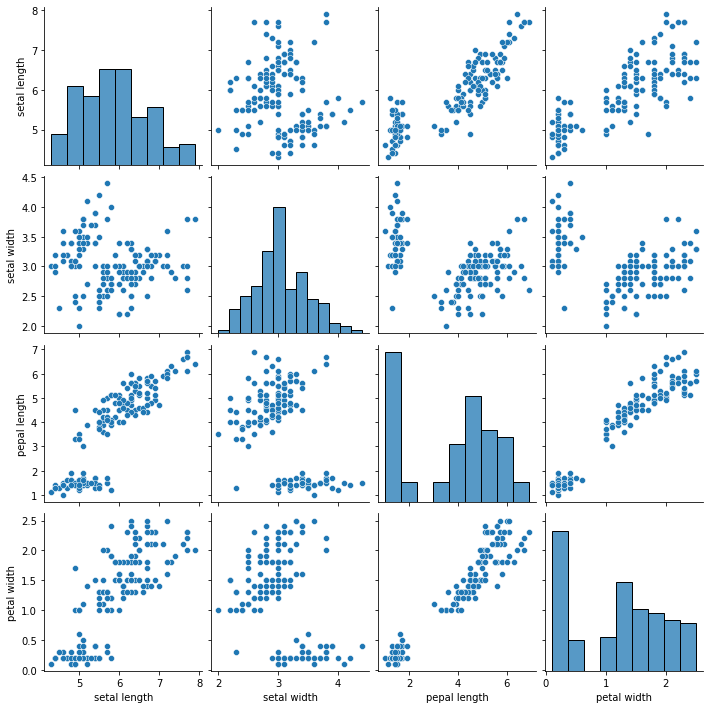

In [43]:
import seaborn as sns

# Use seaborn's pairplot() which is useful to scatter plot all the features at once instead of plotting them individually.
sns.pairplot(df)

'\nConslusion: pepal length and pepal width features are slightly correlated with each other (0.96)\n'

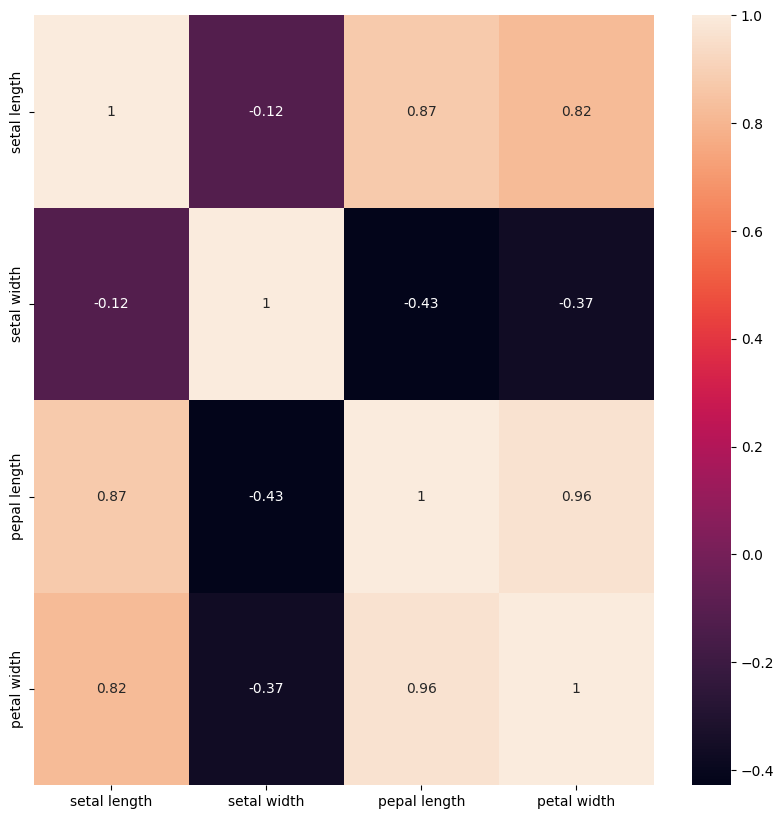

In [54]:
import matplotlib.pyplot as plt

# Check feature correlation to each other using heatma
plt.figure(figsize=(10,10)) # Set figure size
sns.heatmap(df.corr(),annot=True) # Use df.corr() to compute pairwise correlation of columns, excluding NA/null values.
plt.plot()

"""
Conslusion: pepal length and pepal width features are slightly correlated with each other (0.96)
"""

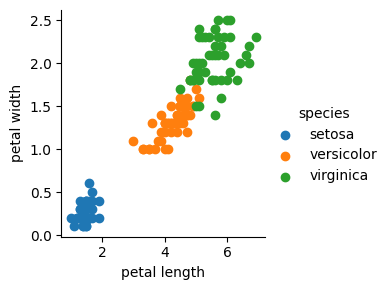

In [62]:
# Check data distribution based on pepal length and width features with scatterplot

sns.FacetGrid(df,hue="species")\
.map(plt.scatter,"petal length","petal width")\
.add_legend()
plt.show()